<div align = 'center'> Pitstops

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

pit_stops = pd.read_csv('pit_stops.csv',encoding = "utf-8")
print('This is the pit stops data')
print(pit_stops.head())
drivers = pd.read_csv('drivers.csv',encoding = "utf-8")
print('This is the drivers data')
print(drivers.head())
circuits = pd.read_csv('circuits.csv',encoding = "utf-8")
print('This is the circuits data')
print(circuits.head())

my_pitstops = pd.DataFrame(pit_stops, columns = ['driverId', 'milliseconds'])
print(my_pitstops.head(10))

driverId = np.array(pit_stops['driverId'].values)
duration = pd.Series(pit_stops['milliseconds'].values)

len(driverId)




This is the pit stops data
   raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842
This is the drivers data
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton

8887

In [48]:
duration.describe()

count    8.887000e+03
mean     6.755010e+04
std      2.480021e+05
min      1.289700e+04
25%      2.191550e+04
50%      2.354600e+04
75%      2.609900e+04
max      2.077164e+06
dtype: float64

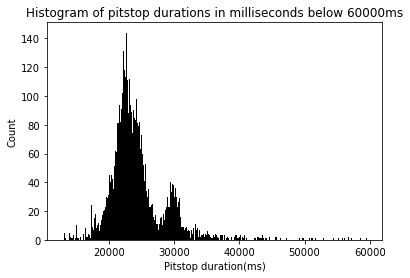

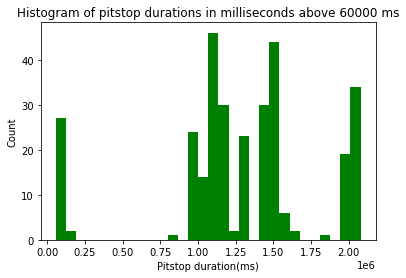

In [9]:
durations = list(pit_stops['milliseconds'].values)
durations_60 = []
durations_60plus = []

for i in durations:
    if i < 60000:
        durations_60.append(i)
        
plt.figure()
plt.hist(durations_60, bins = 600, color = 'black')
plt.title('Histogram of pitstop durations in milliseconds below 60000ms')
plt.xlabel('Pitstop duration(ms)')
plt.ylabel('Count')
plt.show()

for i in durations:
    if i >= 60000:
        durations_60plus.append(i)
        
plt.figure()
plt.hist(durations_60plus, bins=30, color = 'green')
plt.title('Histogram of pitstop durations in milliseconds above 60000 ms')
plt.xlabel('Pitstop duration(ms)')
plt.ylabel('Count')
plt.show()


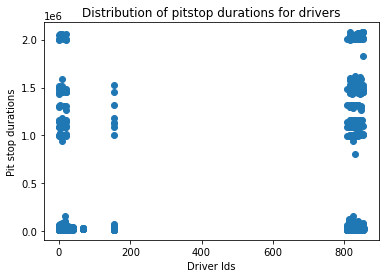

In [49]:
times = my_pitstops.groupby('driverId')

times.head()
driverIds = np.array(pit_stops['driverId'].values)
durationss = pd.Series(pit_stops['milliseconds'].values)

plt.figure()
plt.title('Distribution of pitstop durations for drivers')
plt.xlabel('Driver Ids')
plt.ylabel('Pit stop durations')
plt.scatter(driverIds, durationss)
plt.show()

In [66]:
results = pd.read_csv('results.csv',encoding = "utf-8")
print('This is the results data')
print(results.head())

This is the results data
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300      

In [67]:
gb = results.groupby('raceId')
race1074_results = gb.get_group(1074)
my_results = pd.DataFrame(race1074_results, columns = ['driverId', 'milliseconds'])
my_results.sort_values(by=['driverId'], ascending = [True])
my_results.head()

,driverId,milliseconds
25400,844,5853584
25401,832,5859182
25402,1,5863259
25403,847,5864795
25404,825,5868338


In [68]:
gb2 = pit_stops.groupby('raceId')
race1074_pitstops = gb2.get_group(1074)
my_pitstops2 = pd.DataFrame(race1074_pitstops, columns = ['driverId', 'milliseconds'])
my_pitstops2.sort_values(by=['driverId'])
my_pitstops2.head()

,driverId,milliseconds
8829,1,25201
8830,4,25365
8831,854,25214
8832,848,24874
8833,830,24897


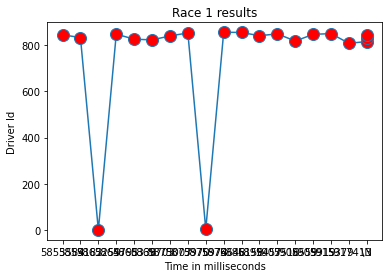

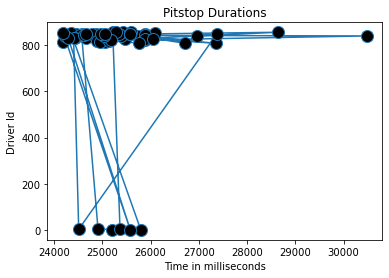

In [69]:
drivers = np.array(my_results['driverId'].values)
results = pd.Series(my_results['milliseconds'].values)
drivers_pit = np.array(my_pitstops2['driverId'].values)
durations_pit = pd.Series(my_pitstops2['milliseconds'].values)

plt.figure()
plt.title('Race 1 results')
plt.xlabel('Time in milliseconds')
plt.ylabel('Driver Id')
plt.plot(results, drivers, marker = 'o', markerfacecolor = 'red', markersize = 12)
plt.show()

plt.figure()
plt.title('Pitstop Durations')
plt.xlabel('Time in milliseconds')
plt.ylabel('Driver Id')
plt.plot(durations_pit, drivers_pit, marker = 'o', markerfacecolor = 'black', markersize = 12)
plt.show()

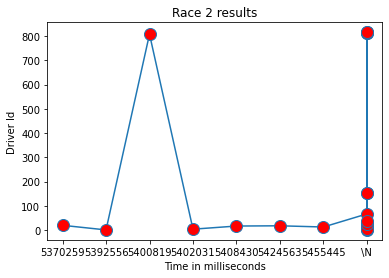

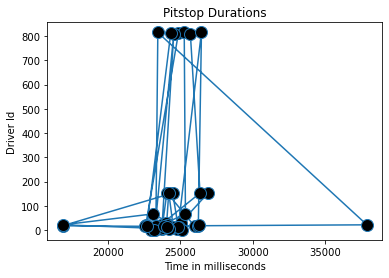

In [56]:
gb = results.groupby('raceId')
race1074_results = gb.get_group(841)
my_results = pd.DataFrame(race1074_results, columns = ['driverId', 'milliseconds'])
my_results.sort_values(by=['driverId'], ascending = [True])
my_results.head()

gb2 = pit_stops.groupby('raceId')
race1074_pitstops = gb2.get_group(841)
my_pitstops2 = pd.DataFrame(race1074_pitstops, columns = ['driverId', 'milliseconds'])
my_pitstops2.sort_values(by=['driverId'])
my_pitstops2.head()

drivers = np.array(my_results['driverId'].values)
results = pd.Series(my_results['milliseconds'].values)
drivers_pit = np.array(my_pitstops2['driverId'].values)
durations_pit = pd.Series(my_pitstops2['milliseconds'].values)

plt.figure()
plt.title('Race 2 results')
plt.xlabel('Time in milliseconds')
plt.ylabel('Driver Id')
plt.plot(results, drivers, marker = 'o', markerfacecolor = 'red', markersize = 12)
plt.show()

plt.figure()
plt.title('Pitstop Durations')
plt.xlabel('Time in milliseconds')
plt.ylabel('Driver Id')
plt.plot(durations_pit, drivers_pit, marker = 'o', markerfacecolor = 'black', markersize = 12)
plt.show()

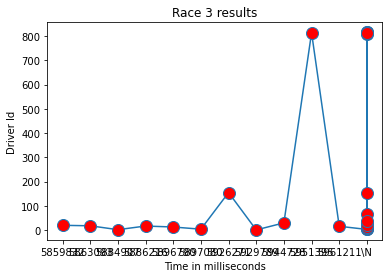

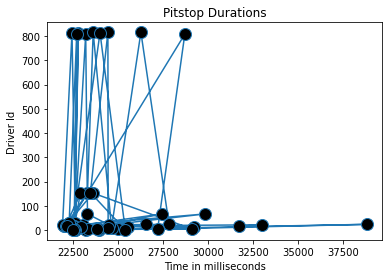

In [63]:
gb = results.groupby('raceId')
race1074_results = gb.get_group(842)
my_results = pd.DataFrame(race1074_results, columns = ['driverId', 'milliseconds'])
my_results.sort_values(by=['driverId'], ascending = [True])
my_results.head()

gb2 = pit_stops.groupby('raceId')
race1074_pitstops = gb2.get_group(842)
my_pitstops2 = pd.DataFrame(race1074_pitstops, columns = ['driverId', 'milliseconds'])
my_pitstops2.sort_values(by=['driverId'])
my_pitstops2.head()

drivers = np.array(my_results['driverId'].values)
results = pd.Series(my_results['milliseconds'].values)
drivers_pit = np.array(my_pitstops2['driverId'].values)
durations_pit = pd.Series(my_pitstops2['milliseconds'].values)

plt.figure()
plt.title('Race 3 results')
plt.xlabel('Time in milliseconds')
plt.ylabel('Driver Id')
plt.plot(results, drivers, marker = 'o', markerfacecolor = 'red', markersize = 12)
plt.show()

plt.figure()
plt.title('Pitstop Durations')
plt.xlabel('Time in milliseconds')
plt.ylabel('Driver Id')
plt.plot(durations_pit, drivers_pit, marker = 'o', markerfacecolor = 'black', markersize = 12)
plt.show()